In [1]:
from heapq import nsmallest
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_csv('weather_forecast_data.csv')
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,19.096119,71.651723,14.782324,48.699257,987.954760,no rain
1,27.112464,84.183705,13.289986,10.375646,1035.430870,no rain
2,20.433329,42.290424,7.216295,6.673307,1033.628086,no rain
3,19.576659,40.679280,4.568833,55.026758,1038.832300,no rain
4,19.828060,93.353211,0.104489,30.687566,1009.423717,no rain
...,...,...,...,...,...,...
2495,14.684023,82.054139,8.751728,58.939058,1003.418337,rain
2496,20.754521,92.099534,17.305508,70.889921,1049.801435,rain
2497,22.087516,71.530065,0.857918,84.162554,1039.664865,rain
2498,18.542453,97.451961,5.429309,54.643893,1014.769130,rain


# Task 1: Preprocessing

## Does the dataset contain any missing data? Identify them.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2475 non-null   float64
 1   Humidity     2460 non-null   float64
 2   Wind_Speed   2468 non-null   float64
 3   Cloud_Cover  2467 non-null   float64
 4   Pressure     2473 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [4]:
df.isna().sum()

Temperature    25
Humidity       40
Wind_Speed     32
Cloud_Cover    33
Pressure       27
Rain            0
dtype: int64

In [5]:
df[df.isna().any(axis=1)]

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
8,NaN,89.077804,4.842197,83.941093,1029.932706,no rain
25,26.420959,72.283460,NaN,0.812305,1018.818494,no rain
59,11.069078,89.683583,5.804538,NaN,992.303157,no rain
68,NaN,58.981077,6.261278,37.580222,1019.684713,no rain
74,33.078976,81.000650,5.744880,86.933978,NaN,no rain
...,...,...,...,...,...,...
2429,NaN,93.920582,13.302477,90.346087,998.183246,rain
2436,16.838551,86.248171,13.326615,NaN,1004.497445,rain
2445,14.279301,NaN,19.789469,95.934640,1031.653350,rain
2446,13.695217,95.727543,NaN,65.020145,983.800057,rain


## Splitting our data to training and testing for training and evaluating our models
## Apply the two techniques to handle missing data, dropping missing values and replacing them with the average of the feature.

In [6]:
DROP_MISSING_VALUES = False

if DROP_MISSING_VALUES:
    dropped_missing = df.dropna()
    
    X = dropped_missing.drop(columns=['Rain'])
    Y = dropped_missing['Rain']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
    
else:
    X = df.drop(columns=['Rain'])
    Y = df['Rain']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

## Does our data have the same scale? If not, you should apply feature scaling on them.

In [7]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2475.000000,2460.000000,2468.000000,2467.000000,2473.000000
mean,22.573777,64.366909,9.911826,49.808770,1014.409327
std,7.332397,19.973824,5.780705,29.062298,20.182257
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.356603,47.183183,4.782528,24.261914,997.029601
50%,22.533110,64.090914,9.908572,49.692078,1013.583677
75%,28.984159,81.561021,14.953142,75.417253,1031.762839
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Task 2: Implement Decision Tree, k-Nearest Neighbors (kNN) and naïve Bayes

## Implement k-Nearest Neighbors (kNN) algorithm from scratch.

In [9]:
def knn_from_scratch(X_train, Y_train, point, k):
    def dist(neighbor):
        return ((point - neighbor[0]) ** 2).sum()
    
    nearest_k_neighbors = nsmallest(k, zip(X_train, Y_train), key=dist)
    counter = Counter(y for _, y in nearest_k_neighbors)
    return counter.most_common(1)[0][0]

In [10]:
def eval_pred(pred):
    print('Accuracy:', accuracy_score(Y_test, pred))
    print('Precision:', precision_score(Y_test, pred, pos_label='no rain'))
    print('Recall:', recall_score(Y_test, pred, pos_label='no rain'))

## Scikit-learn Decision Tree

In [11]:
print('Decision Tree')
decision_tree = DecisionTreeClassifier().fit(X_train, Y_train)
eval_pred(decision_tree.predict(X_test))

Decision Tree
Accuracy: 0.994
Precision: 1.0
Recall: 0.9931350114416476


## Scikit-learn KNN

In [12]:
print('KNN')
for k in range(3, 13, 2):
    print(f'k = {k}')
    eval_pred(KNeighborsClassifier(k).fit(X_train, Y_train).predict(X_test))

KNN
k = 3
Accuracy: 0.958
Precision: 0.9792626728110599
Recall: 0.9725400457665904
k = 5
Accuracy: 0.958
Precision: 0.9727272727272728
Recall: 0.9794050343249427
k = 7
Accuracy: 0.956
Precision: 0.9705215419501134
Recall: 0.9794050343249427
k = 9
Accuracy: 0.958
Precision: 0.9727272727272728
Recall: 0.9794050343249427
k = 11
Accuracy: 0.958
Precision: 0.9727272727272728
Recall: 0.9794050343249427


## KNN from scratch

In [13]:
print('KNN from scratch')
for k in range(3, 13, 2):
    print(f'k = {k}')
    eval_pred([knn_from_scratch(X_train, Y_train, point, k) for point in X_test])

KNN from scratch
k = 3
Accuracy: 0.958
Precision: 0.9792626728110599
Recall: 0.9725400457665904
k = 5
Accuracy: 0.958
Precision: 0.9727272727272728
Recall: 0.9794050343249427
k = 7
Accuracy: 0.956
Precision: 0.9705215419501134
Recall: 0.9794050343249427
k = 9
Accuracy: 0.958
Precision: 0.9727272727272728
Recall: 0.9794050343249427
k = 11
Accuracy: 0.958
Precision: 0.9727272727272728
Recall: 0.9794050343249427


## Naïve Bayes

In [14]:
print('Naïve Bayes')
eval_pred(GaussianNB().fit(X_train, Y_train).predict(X_test))

Naïve Bayes
Accuracy: 0.954
Precision: 0.9519650655021834
Recall: 0.9977116704805492


# Task 3: Interpreting the Decision Tree and Evaluation Metrics Report

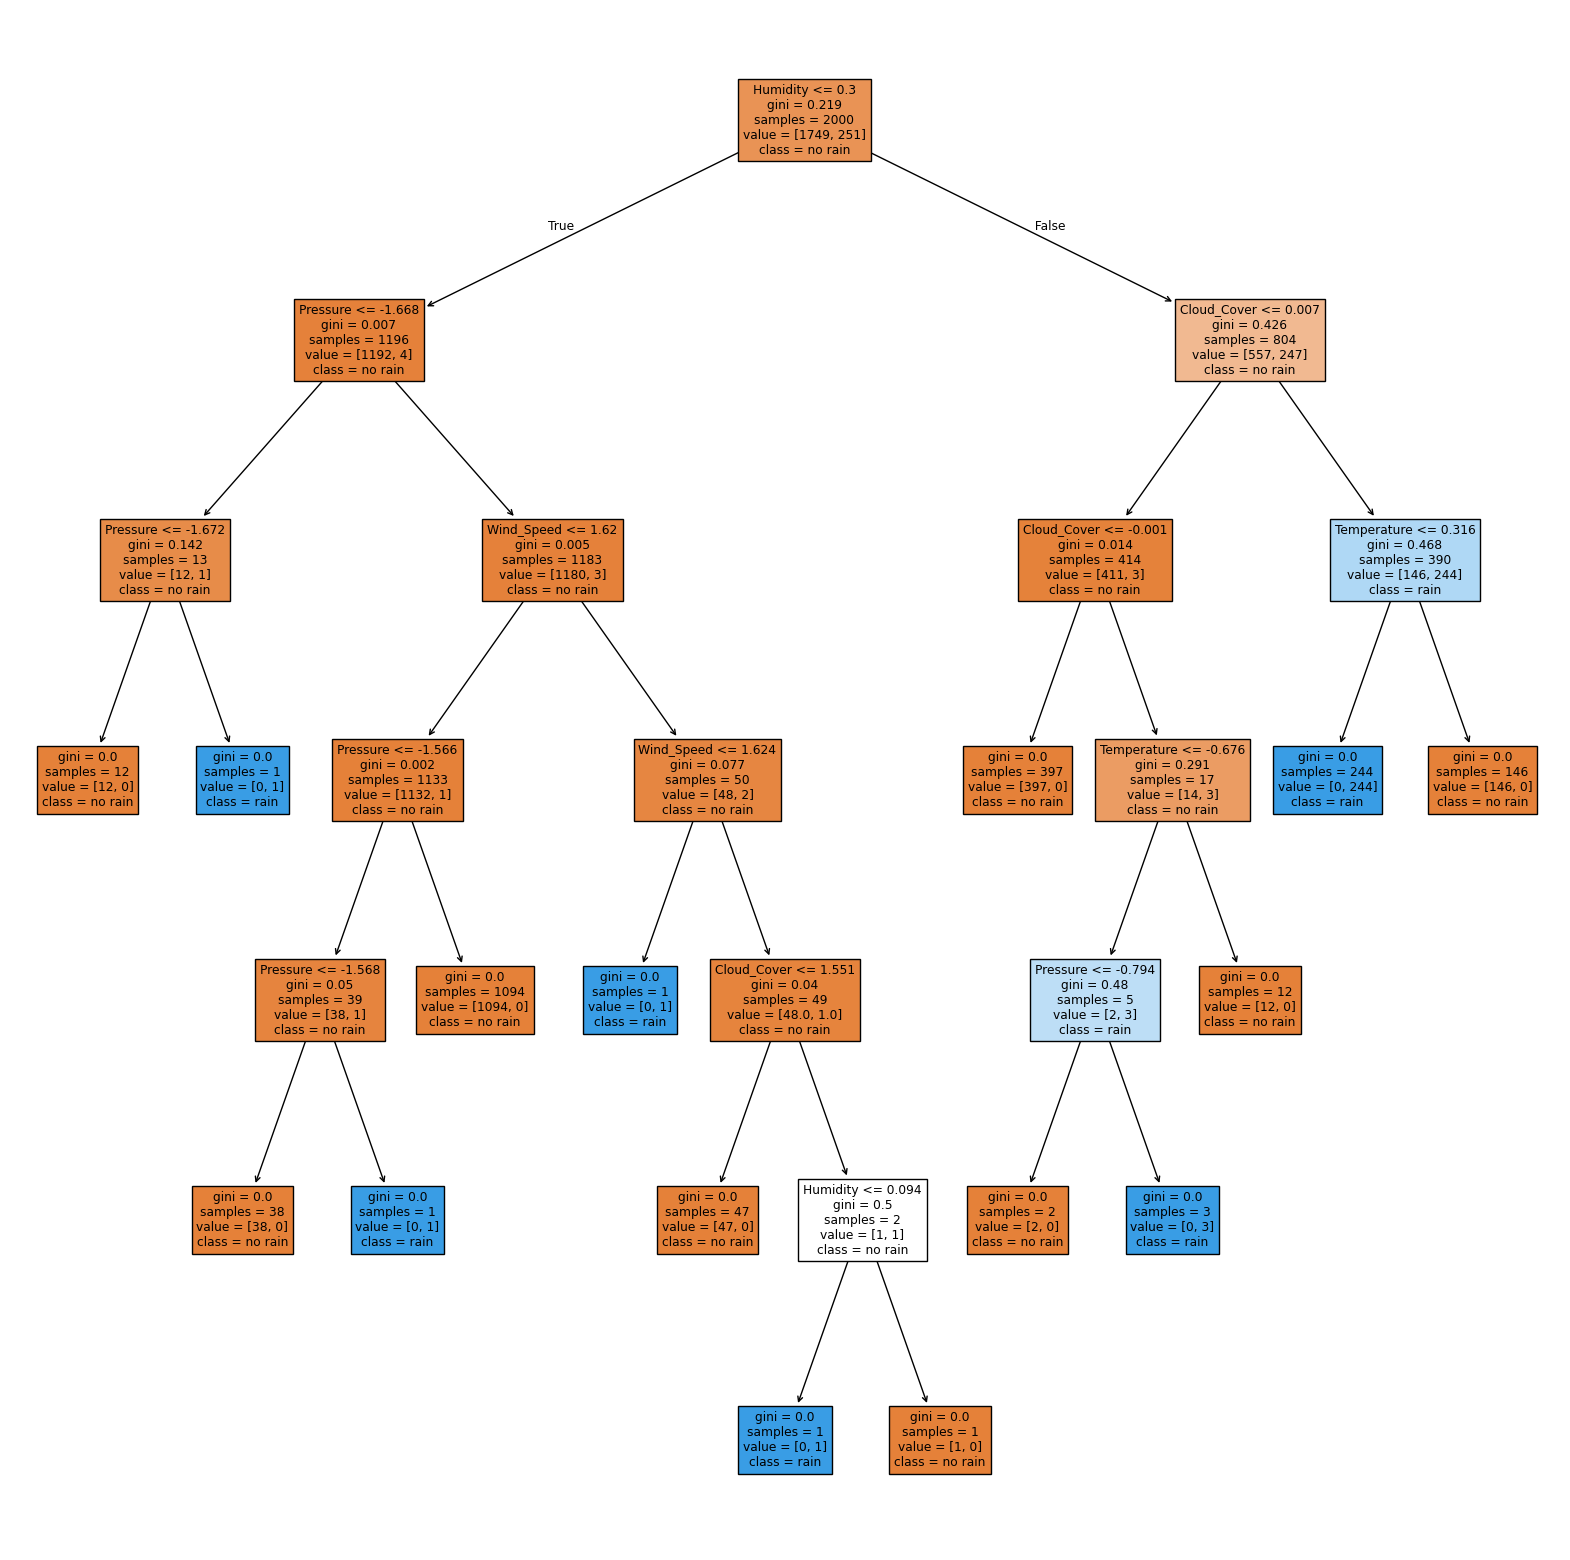

In [15]:
plt.figure(figsize=(20, 20))

_ = plot_tree(
    decision_tree,
    feature_names=X.columns,
    class_names=['no rain', 'rain'],
    filled=True,
)